Here, we provide a lite version of cell segmentation for SMURF using the FFPE Mouse Brain data from 10x. Notably, this version does not require any GPU resources.

### Dataset Information

Access the dataset here: [Visium HD CytAssist Gene Expression Libraries of Mouse Brain](https://www.10xgenomics.com/datasets/visium-hd-cytassist-gene-expression-libraries-of-mouse-brain-he)

### Important Downloads

To download the necessary files, run the following commands:

```python
# Download data from 10x
!mkdir -p "smurf_example_data"
!wget -P smurf_example_data https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Brain/Visium_HD_Mouse_Brain_tissue_image.tif
!wget -P smurf_example_data https://cf.10xgenomics.com/samples/spatial-exp/3.0.0/Visium_HD_Mouse_Brain/Visium_HD_Mouse_Brain_binned_outputs.tar.gz
!tar -xzvf smurf_example_data/Visium_HD_Mouse_Brain_binned_outputs.tar.gz -C smurf_example_data

# Download our nuclei segmentation results if needed
!curl -L -o smurf_example_data/segmentation_final.npy.gz https://github.com/The-Mitra-Lab/SMURF/raw/main/data/segmentation_final.npy.gz
!gunzip smurf_example_data/segmentation_final.npy.gz
```

If you use the same cell segmentation method as introduced, you may skip the first part until the section labeled [Start here](#section1).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scanpy as sc
import anndata

import smurf as su

import pickle
import copy

Here, we define your data path and saving path. Ensure that your data path includes the complete HE or DAPI image and a folder containing `square_002um` data. Specifically, you will need `tissue_positions.parquet` and `filtered_feature_bc_matrix`.


In [2]:
import os

data_path = 'smurf_example_data/'
save_path = 'results_example_mousebrain/'

# Check if the directory exists
if not os.path.exists(save_path):
    # If it doesn't exist, create it
    os.makedirs(save_path)


We start building our So (spatial object). The input should be your `tissue_positions.parquet` in `'square_002um/spatial'`, the final full image, and the format of your experiment (either `'HE'` or `'DAPI'`).

In [3]:
so = su.prepare_dataframe_image(data_path+'binned_outputs/square_002um/spatial/tissue_positions.parquet',
                                data_path+'Visium_HD_Mouse_Brain_tissue_image.tif',
                               'HE')

Please use your own tools to perform cell segmentation on `so.image_temp()` (the area covered by Visium HD in the original image). Set all background pixels to `0` and assign each cell a unique integer cell ID. `segmentation_final` should be a NumPy array with the same shape as `so.image_temp()`.

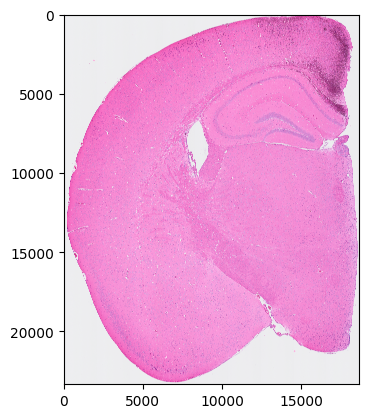

In [4]:
plt.imshow(so.image_temp())
plt.show()
plt.close()

In [5]:
so.segmentation_final = np.load(data_path + 'segmentation_final.npy')

Now, we start generating cell and spot information to prepare for the analysis.


In [6]:
so.generate_cell_spots_information()

Generating cells information.


100%|██████████| 23340/23340 [01:08<00:00, 342.41it/s]


Generating spots information.


100%|██████████| 23340/23340 [02:56<00:00, 132.38it/s]


Filtering cells
We have 57300 nuclei in total.
Creating NN network


Visualize the nuclei segmentation results overlaid on the original HE or DAPI image. Ensure that the results are meaningful and that the segmented nuclei accurately align with the original image.

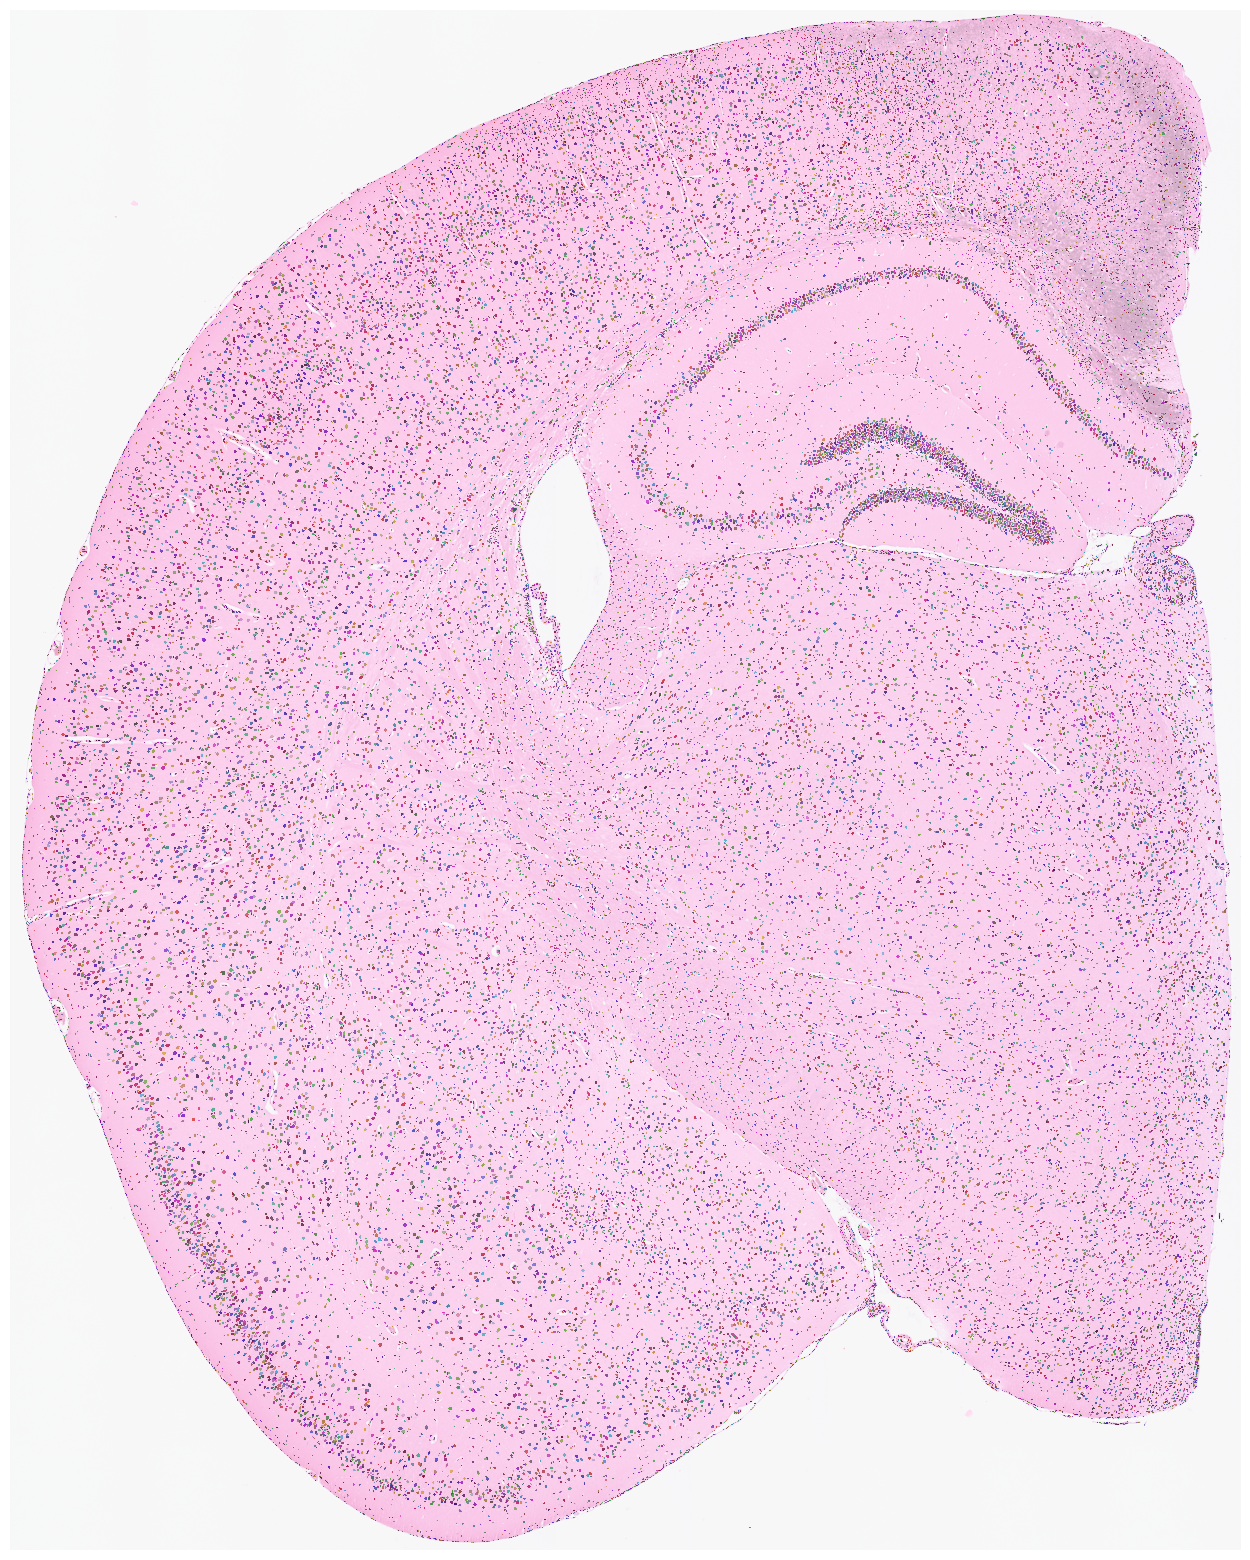

In [7]:
su.plot_results(so.image_temp(), so.segmentation_final )

# Start Here <a id="section1"></a>
## if you use the same cell segmentation method as introduced:

```python
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import scanpy as sc
import anndata

import smurf as su

import pickle
import copy


with open(save_path + 'so.pkl', 'rb') as file:
    so = pickle.load(file)

```


Load `adata` from the original the 2um results.

In [8]:
# load adata from original 2um results

adata = sc.read_10x_mtx(data_path +'binned_outputs/square_002um/filtered_feature_bc_matrix')
adata = copy.deepcopy(adata[so.df[so.df.in_tissue == 1]['barcode']])
adata.obs

Empty DataFrame
Columns: []
Index: [s_002um_02448_01644-1, s_002um_00700_02130-1, s_002um_00305_01021-1, s_002um_02703_00756-1, s_002um_02278_00850-1, s_002um_01729_00511-1, s_002um_02148_02515-1, s_002um_00639_00600-1, s_002um_01016_02194-1, s_002um_00775_02414-1, s_002um_00923_01639-1, s_002um_01050_01530-1, s_002um_01433_01112-1, s_002um_02190_01811-1, s_002um_03135_01989-1, s_002um_01596_01155-1, s_002um_01155_02571-1, s_002um_02451_02133-1, s_002um_01779_01509-1, s_002um_00533_01751-1, s_002um_01236_02049-1, s_002um_00460_00574-1, s_002um_02924_02279-1, s_002um_01867_02041-1, s_002um_00554_02074-1, s_002um_01755_01437-1, s_002um_01595_00752-1, s_002um_01862_00851-1, s_002um_02109_01204-1, s_002um_02944_02213-1, s_002um_02106_02704-1, s_002um_00188_01689-1, s_002um_02503_02060-1, s_002um_00036_00739-1, s_002um_01057_00712-1, s_002um_02314_00973-1, s_002um_00481_01245-1, s_002um_02580_00991-1, s_002um_02276_00735-1, s_002um_02420_00448-1, s_002um_01364_02046-1, s_002um_01768_02830-1, s_002um_01402_01124-1, s_002um_02284_01864-1, s_002um_00737_02449-1, s_002um_01538_00640-1, s_002um_00397_02086-1, s_002um_01527_02622-1, s_002um_01146_01905-1, s_002um_00658_01219-1, s_002um_01302_01082-1, s_002um_01646_00409-1, s_002um_01684_00528-1, s_002um_00843_00835-1, s_002um_01928_02658-1, s_002um_01017_00647-1, s_002um_00858_01826-1, s_002um_00727_01427-1, s_002um_01508_01696-1, s_002um_01790_02283-1, s_002um_02418_01612-1, s_002um_00160_01234-1, s_002um_00725_00490-1, s_002um_02344_00939-1, s_002um_01844_01622-1, s_002um_02873_01611-1, s_002um_02087_00442-1, s_002um_00555_00492-1, s_002um_01846_01066-1, s_002um_01713_01364-1, s_002um_01319_01387-1, s_002um_02675_00819-1, s_002um_01719_00951-1, s_002um_01095_02415-1, s_002um_02100_02020-1, s_002um_02381_01432-1, s_002um_01503_01351-1, s_002um_00285_01429-1, s_002um_01176_02057-1, s_002um_01356_02583-1, s_002um_02057_00527-1, s_002um_02969_02275-1, s_002um_02842_01969-1, s_002um_00266_01524-1, s_002um_00294_00385-1, s_002um_01308_01225-1, s_002um_01878_02844-1, s_002um_00787_00683-1, s_002um_02579_02402-1, s_002um_01418_02023-1, s_002um_01399_02540-1, s_002um_01585_00778-1, s_002um_00375_01492-1, s_002um_02668_02292-1, s_002um_01523_02453-1, s_002um_01411_00869-1, s_002um_00580_01664-1, s_002um_01864_00903-1, s_002um_02685_02409-1, s_002um_00519_00688-1, ...]

[6296688 rows x 0 columns]

In [9]:
sc.pp.filter_genes(adata, min_counts=1000) 

Here, we begin by generating the `nuclei*genes` matrix. The result will be stored in `so.final_nuclei`.

In [10]:
su.nuclei_rna(adata,so)
adata_sc = copy.deepcopy(so.final_nuclei)
adata_sc

100%|██████████| 57300/57300 [01:10<00:00, 807.46it/s] 


AnnData object with n_obs × n_vars = 57300 × 9970
    var: 'gene_ids', 'feature_types'

Filter cells by counts while preserving the raw data version.

In [11]:
sc.pp.filter_cells(adata_sc, min_counts=5)
adata_raw = copy.deepcopy(adata_sc)
adata_raw 

AnnData object with n_obs × n_vars = 56867 × 9970
    obs: 'n_counts'
    var: 'gene_ids', 'feature_types'

In [12]:
adata_raw = copy.deepcopy(adata_sc)

Initial analysis of nuclei data. Note that many datasets may not perform well at this stage; it is normal to observe hundreds of clusters due to low-quality nuclei counts.

Starting mt
Starting normalization
Starting PCA
Starting UMAP


/home/juanru/miniconda3/envs/bidcell/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Starting Clustering


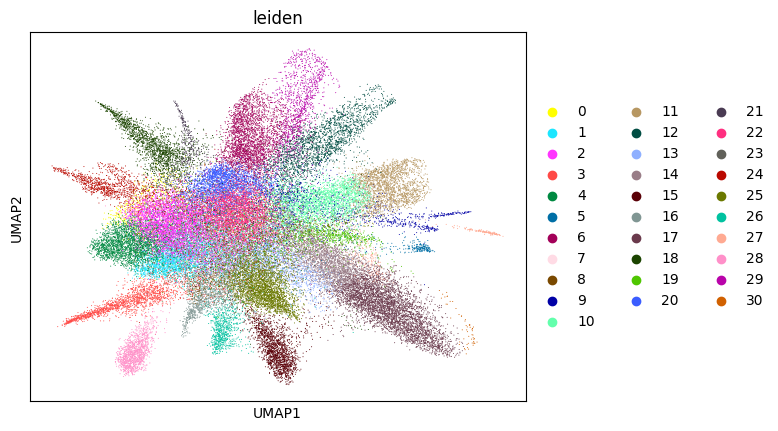

In [13]:
adata_sc = su.singlecellanalysis(adata_sc,resolution=2)

Here, we start performing iterations. Note that this function can be time-consuming.

100%|██████████| 56867/56867 [01:04<00:00, 881.84it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


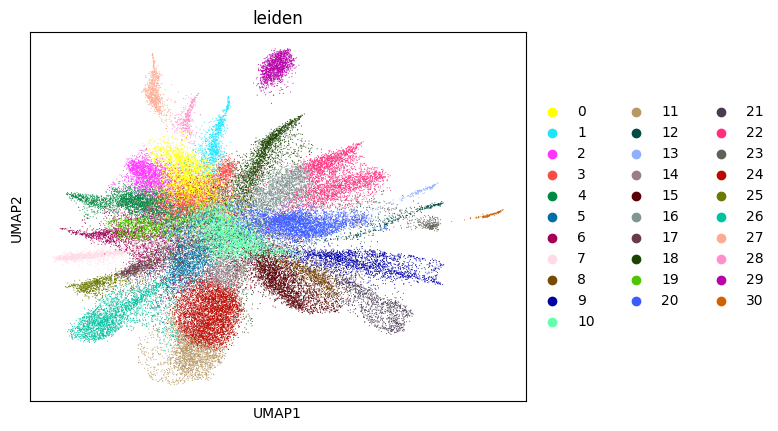

0.42855472274655915 1


100%|██████████| 56867/56867 [01:04<00:00, 882.21it/s]


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


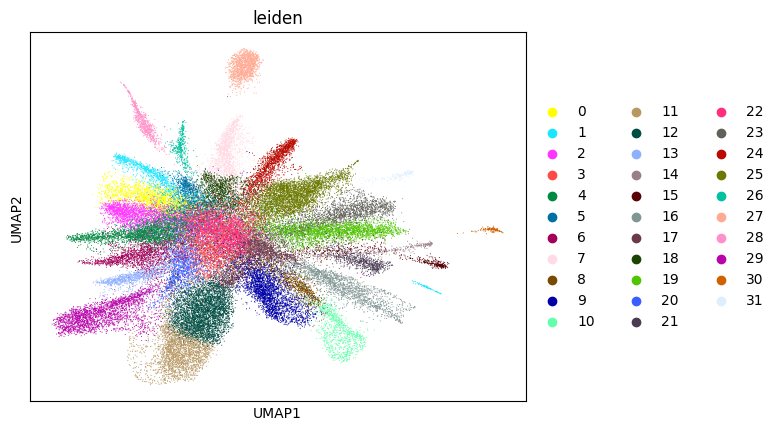

0.6737852847699389 2


100%|██████████| 56867/56867 [01:04<00:00, 881.72it/s] 


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


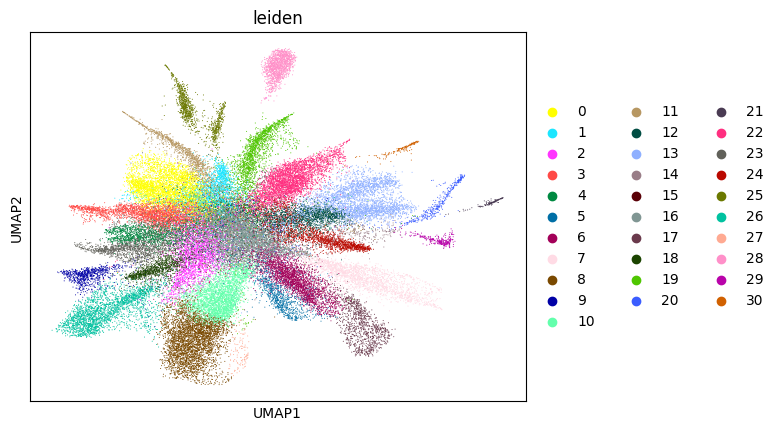

0.6851827106003304 3


100%|██████████| 56867/56867 [01:04<00:00, 880.53it/s] 


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


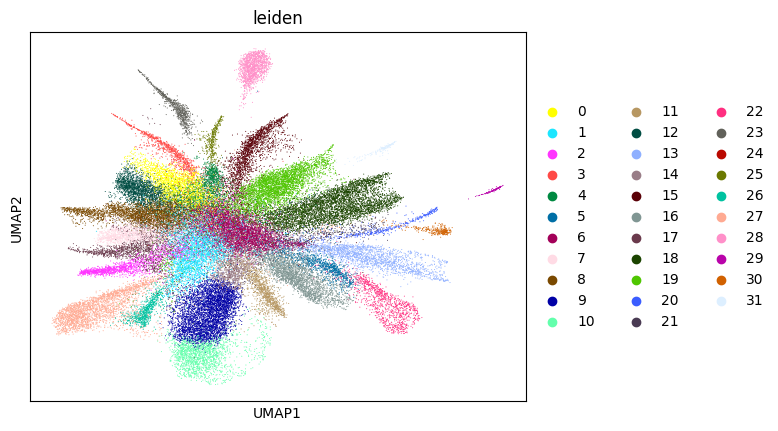

0.6991060339712426 4


100%|██████████| 56867/56867 [01:03<00:00, 890.03it/s] 


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


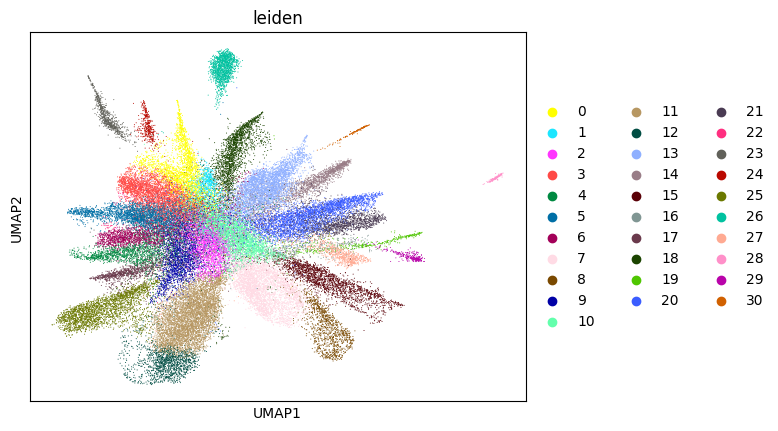

0.7115321705141411 5


100%|██████████| 56867/56867 [01:03<00:00, 889.16it/s] 


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


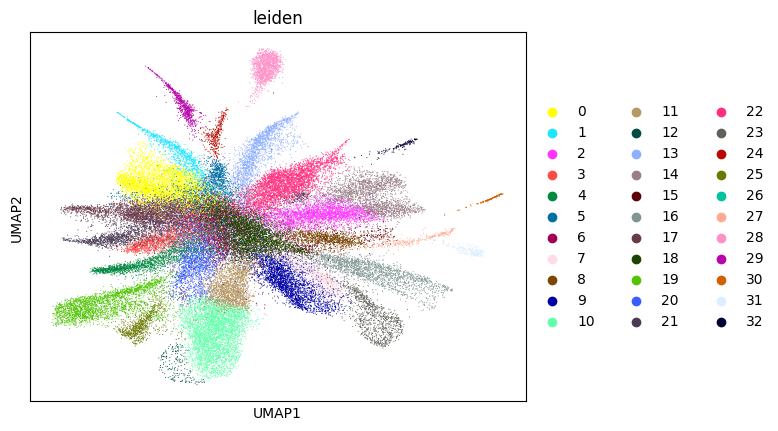

0.7026397798438843 6


100%|██████████| 56867/56867 [01:04<00:00, 885.30it/s] 


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


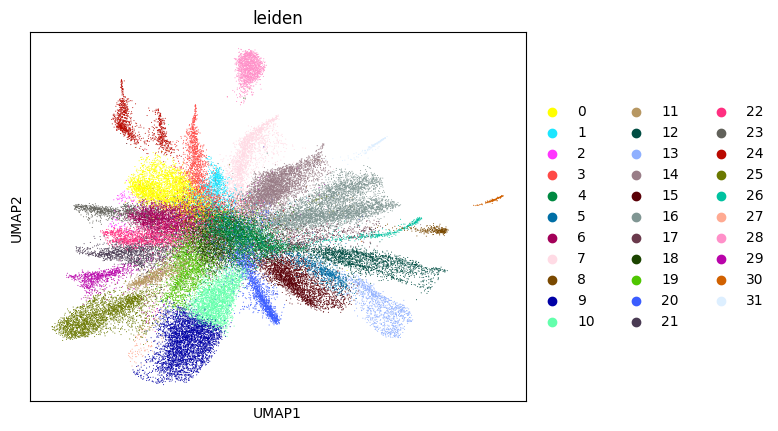

0.7168787361641524 7


100%|██████████| 56867/56867 [01:04<00:00, 879.46it/s] 


Starting mt
Starting normalization
Starting PCA
Starting UMAP
Starting Clustering


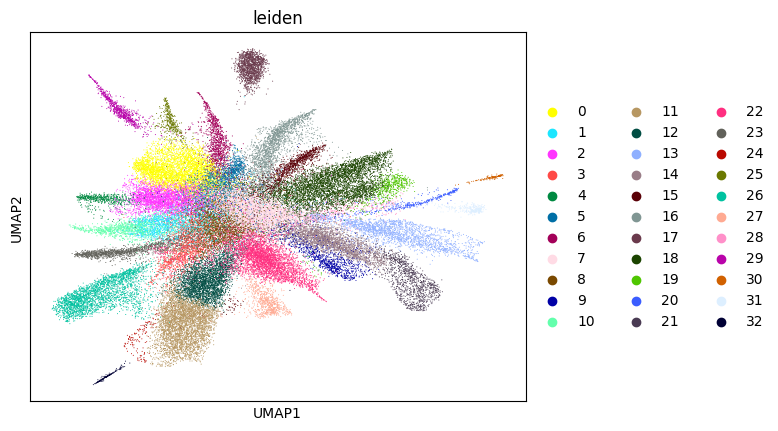

0.7257587985649782 8


 60%|██████    | 34134/56867 [02:18<01:45, 215.63it/s]

In [ ]:
su.itering_arragement(adata_sc, adata_raw, adata, so, resolution=2, save_folder = save_path, show = True, keep_previous = False)

Load results here. Note that the full version differs from the simple version from this point onward. This is your last chance to switch to the full version. (Note that `adatas_final`, `cells_final` and `weights_record` can be used directly there.)

In [ ]:
adatas_final = sc.read_h5ad(save_path +'adatas.h5ad')

with open(save_path +'cells_final.pkl', 'rb') as file:
    cells_final = pickle.load(file)

with open(save_path +'weights_record.pkl', 'rb') as file:
    weights_record = pickle.load(file)

In [ ]:
cell_cluster_final = su.return_celltype_plot(adatas_final, so)
su.plot_cellcluster_position(cell_cluster_final, col_num=5)

Here, we generate the final result. By setting `plot = True`, we will create `so.pixels_cells`, which might take more than half an hour. If you do not need this or have already generated `so.pixels_cells`, set `plot = False`.

Here, `adata_sc_final.obs` contains five columns:

- `cell_cluster`: Denotes the cluster assignment from the iteration.
- `cos_simularity`: The cosine similarity of the cell's gene expression with the average expression of its cluster.
- `cell_size`: The number of `2um` spots occupied by this cell.
- `x` and `y`: The absolute coordinates of the cell, matching the spot locations provided by 10x.


In [ ]:
adata_sc_final = su.get_finaldata_fast(cells_final, so, adatas_final, adata, weights_record, plot = True)
adata_sc_final

Since we are using the filtered version of the data, if you want to obtain a full set of genes for the final dataset, you can use the following code:
```python

adata1 = sc.read_10x_mtx(data_path + '/square_002um/filtered_feature_bc_matrix')
adata1 = adata1[so.df[so.df.in_tissue == 1]['barcode']]
weight_to_celltype = su.calculate_weight_to_celltype(adatas_final, adata1, cells_final, so)
adata_sc_final2 = su.get_finaldata_fast(cells_final, so, adatas_final, adata1, weight_to_celltype, plot = False)


Finally, we create our own pixels-to-cell plot and map it to the original staining image! This should be amazing! Note that saving to a file might take a relatively long time. Use `save=None` or `save=False` if saving is not needed. High DPI settings may also increase processing time; the recommended DPI is 1500.


In [ ]:
su.plot_results(so.image_temp(), so.pixels_cells, dpi = 1500, save = save_path + 'final_results.pdf')

Save your results here.

Please note that `so` is a very large object (as it contains the raw image). If you do not have enough space, use the following method to compress it:

```python
import pickle
import gzip

def save_compressed_pickle(data, filename):
    with gzip.GzipFile(filename, 'wb') as f:
        pickle.dump(data, f, protocol=pickle.HIGHEST_PROTOCOL)

save_compressed_pickle(so, save_path + "so.pkl.gz")
```

You can load your file using this code:
```python
import pickle
import gzip

def load_compressed_pickle(filename):
    with gzip.GzipFile(filename, 'rb') as f:
        return pickle.load(f)

so = load_compressed_pickle(save_path + 'so.pkl.gz')



In [ ]:
with open(save_path + "so.pkl", 'wb') as f:
    pickle.dump(so, f)

adata_sc_final.write(save_path + "adata_sc_final.h5ad")